### Unbiased Stemness State Space
---
#### [Method]
#### 1. select a gene that are previously reported to involve in stemness maintenance
#### 2. calculate Corr between the gene (selected in 1.) and the others
#### 3. pick up some genes highly correlate with the gene (selected in 1.) and make a heat map
#### 4. pca

In [336]:
# Import Library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [382]:
# Set Config
CONFIG = {
    "data_dir": "./TPM.csv"
    , "gene": ["NES"]
    , "CMsize": (5, 5)
    , "CMfontsize": 1.5
    , "CMrotation": (90, 0)
    , "CMcolor": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "CMsc": None
    , "CMdendrosize": (0.2, 0.3)
    , "CMcbarpos": (1.05, 0.15, 0.05, 0.7) 
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 0.8}
    , "threshold": 0.7
    , "adopted_comp": 2
}

In [371]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0).T

In [372]:
# Shape Data
ltpm = np.log2(rawdata+1).sort_index()
ltpm.index.name=None

In [383]:
# Select gene
df = ltpm.loc[:, CONFIG["gene"]]
df

Name,NES
414C2_C34,6.324134
414C2_C34.1,6.321531
414C2_C34.2,5.713022
414C2_DAPT,7.011532
414C2_DAPT.1,6.643496
414C2_DAPT.2,6.303380
414C2_control,7.005581
414C2_control.1,7.036663
414C2_control.2,6.711510
B7_C34,5.679121


In [374]:
# Correlation
nltpm = ltpm.T.values
ndf = df.T.values
res=(1 - cdist(ndf, nltpm, metric='correlation'))
res=pd.DataFrame(res, index=df.columns, columns=ltpm.columns)

In [375]:
# Extract highly correlated genes
res=res[res>=CONFIG["threshold"]].dropna(how='any', axis=1)
ctpm=ltpm.loc[:, list(res.columns)]
ctpm.columns.name = f"{CONFIG['gene']} and correlated genes"
ctpm.to_csv(f"./prolif_correlated_with_{CONFIG['gene']}_threshold={CONFIG['threshold']}.csv", index=True)
ctpm

['SOX2'] and correlated genes,WASH7P,LOC100133331,SAMD11,INTS11,VWA1,SLC35E2B,SLC35E2A,TPRG1L,RPL22,RNF207,...,LOC105377213,SLC6A8,SSR4,RPL10,PLXNA3,MPP1,F8A2 (2),F8A3 (2),F8A2 (3),F8A3 (3)
414C2_C34,2.826296,1.838560,0.874528,6.514708,0.592562,6.690222,5.157005,4.178298,6.579836,1.074881,...,0.000000,4.850334,7.057441,7.612128,3.020538,3.027065,0.905632,0.905632,0.832557,0.832557
414C2_C34.1,2.577556,1.556505,0.531585,6.319337,1.028903,6.627645,4.984715,3.991744,6.484524,0.134852,...,1.145426,4.482790,6.809749,7.569100,2.943790,3.740246,0.804902,0.804902,0.763299,0.763299
414C2_C34.2,2.480490,1.909189,0.038492,6.514811,0.923226,6.374641,4.692729,3.411777,6.475230,0.236139,...,0.000000,4.255507,7.004819,7.605031,2.481355,3.596498,0.000024,0.000024,0.000018,0.000018
414C2_DAPT,2.488584,1.714960,0.574776,6.467971,0.534841,6.695637,5.067565,3.432370,6.373755,0.170554,...,0.000000,4.678212,6.705004,7.697807,3.129466,3.559316,0.619611,0.619611,0.606655,0.606655
414C2_DAPT.1,2.807075,1.589634,0.721365,6.487951,1.294431,6.833713,5.122330,4.206256,6.539708,0.309167,...,0.000000,4.852225,6.857020,7.690638,3.021792,3.754580,0.874431,0.874431,0.805714,0.805714
414C2_DAPT.2,2.627739,1.947594,0.821590,6.617128,0.852117,6.692040,5.010578,3.912572,6.479793,0.594190,...,0.000000,4.308249,6.727963,7.666517,2.839010,2.765010,0.232953,0.232953,0.435814,0.435814
414C2_control,2.319389,1.565811,0.343920,6.333062,0.748992,6.103978,4.563097,3.680394,6.324018,0.000000,...,0.000000,3.417962,6.946717,7.538074,2.226286,2.982851,0.000038,0.000038,0.338295,0.338295
414C2_control.1,2.562228,1.658471,0.166257,6.488461,0.886481,6.170504,4.694471,3.945797,6.428712,0.438101,...,0.000000,3.991218,6.990466,7.600357,2.673173,3.828938,0.673903,0.673903,0.612585,0.612585
414C2_control.2,2.778043,1.837381,0.477335,6.612978,0.791096,6.279204,4.503594,3.744978,6.402157,0.047876,...,0.000000,3.258072,6.901862,7.583928,2.504821,3.855001,0.357807,0.357807,0.034154,0.034154
B7_C34,3.342845,2.287730,2.477687,6.930699,2.303633,6.696735,5.163038,4.574373,6.784161,4.175771,...,3.820306,4.894352,7.256400,8.093955,3.151918,6.133401,1.570897,1.570897,1.601151,1.601151


/opt/conda/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 360x360 with 0 Axes>

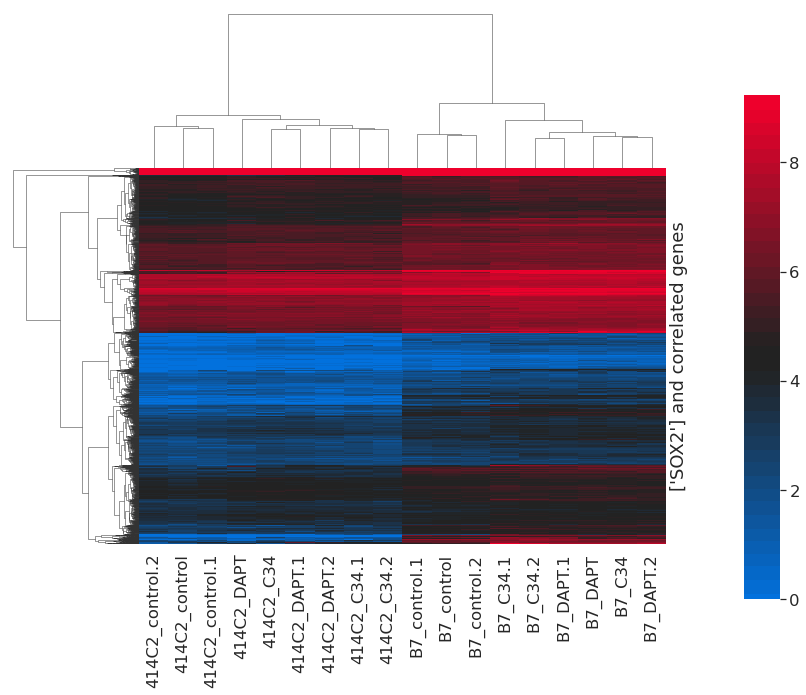

In [376]:
# Cluster Map
plt.figure(figsize=CONFIG["CMsize"])
sns.set(font_scale=CONFIG["CMfontsize"])
CM = sns.clustermap(ctpm.T
               , cmap=CONFIG["CMcolor"]
               , robust=True
               , center=ctpm.mean().mean()
               , row_colors=CONFIG["CMsc"]
               , col_colors=CONFIG["CMsc"]
               , dendrogram_ratio=CONFIG["CMdendrosize"]
               , cbar_pos=CONFIG["CMcbarpos"]
               , yticklabels=False
              )
plt.setp(CM.ax_heatmap.get_xticklabels(), rotation=CONFIG["CMrotation"][0])
plt.setp(CM.ax_heatmap.get_yticklabels(), rotation=CONFIG["CMrotation"][1])
plt.savefig(f"./prolif_CM_{CONFIG['gene']}_t={CONFIG['threshold']}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [377]:
# PCA
model = PCA(random_state=0)
model.fit(ctpm)
Rdata = pd.DataFrame(model.transform(ctpm), index=ctpm.index, columns=[f"PC{i}"for i in range(1, len(ctpm)+1)])

In [378]:
# Contribution
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

cont = pd.DataFrame(temp
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PC_{i}" for i in range(1, len(ctpm)+1)]
).T
cont.to_csv(f"prolif_contribution_{CONFIG['gene']}_threshold={CONFIG['threshold']}.csv", index=True)
cont

,contribution [%],cumulative contribution [%]
PC_1,84.95,84.95
PC_2,4.56,89.51
PC_3,1.53,91.04
PC_4,1.32,92.37
PC_5,1.03,93.40
PC_6,0.86,94.26
PC_7,0.85,95.10
PC_8,0.69,95.79
PC_9,0.66,96.45
PC_10,0.57,97.02


In [379]:
# Save Data as csv.
Pdata = pd.DataFrame(model.transform(df)[:, :CONFIG["adopted_comp"]]
                       , columns=[f"PC{i}"for i in range(1, CONFIG["adopted_comp"]+1)]
                       , index=ctpm.index
                      )
Pdata.to_csv(f"prolif_PCAed_data_{CONFIG['gene']}_t={CONFIG['threshold']}_n={CONFIG['adopted_comp']}.csv", index=True)

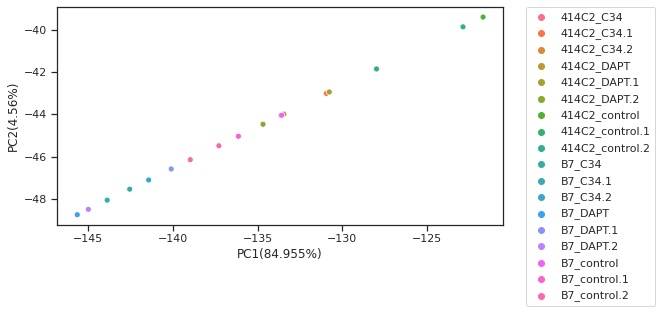

In [380]:
# Plot
sns.set() 
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (8,4))
[pc1, pc2] = model.explained_variance_ratio_[0:2]
PC1 = round(100*pc1, 3)
PC2 = round(100*pc2, 3)
sns.scatterplot(x="PC1", y="PC2", data=Pdata, hue=Pdata.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel=f"PC1({PC1}%)",ylabel=f"PC2({PC2}%)")
plt.savefig(f"prolif_{CONFIG['gene']}_t={CONFIG['threshold']}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

### やること
#### 1. 未分化性評価の棒グラフ PC1　3 genes x 2 lines
#### 2. Cluster Map x 3genes
#### 3. gene names .csv